<IPython.core.display.Javascript object>


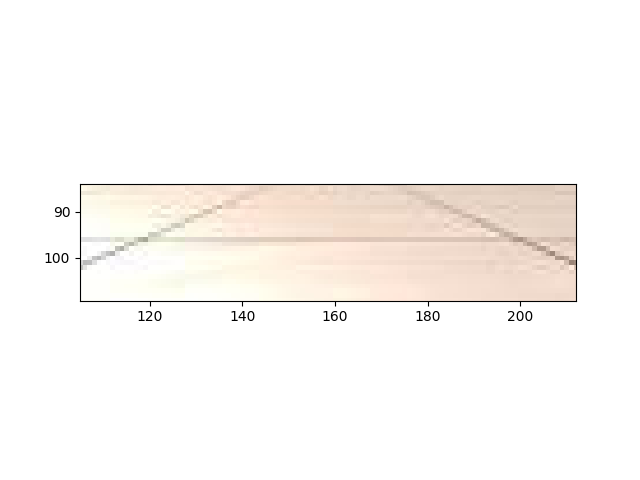

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
%matplotlib notebook
image = mpimg.imread('example_grid1.jpg')
plt.imshow(image)


Image Shape[0]:160


<IPython.core.display.Javascript object>


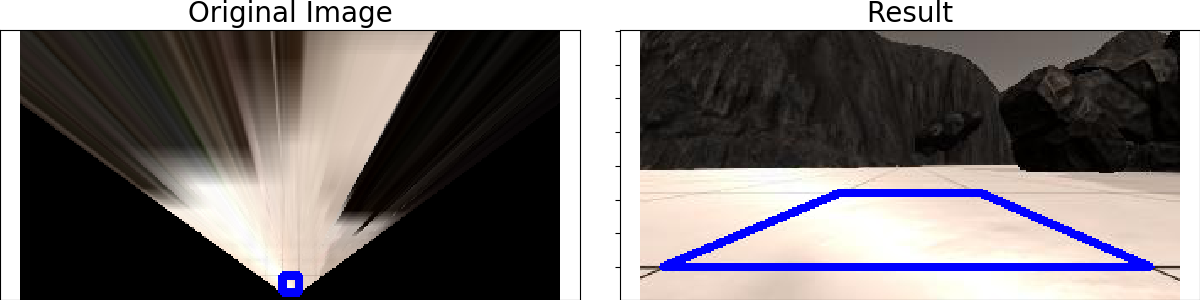

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('example_grid1.jpg')

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# TODO:
# Define a box in source (original) and 
# destination (desired) coordinates
# Right now source and destination are just 
# set to equal the four corners
# of the image so no transform is taking place
# Try experimenting with different values!
dst_size = 5 
bottom_offset= 5
source = np.float32([[13, 140], 
                 [302, 140], 
                 [201, 96],
                 [118, 96] 
                 ])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                 [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset], 
                 [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset - dst_size*2], 
                 [image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset - dst_size*2]]
                 )

warped = perspect_transform(image, source, destination)
print("Image Shape[0]:"+str(image.shape[0]))
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
f.tight_layout()
ax1.imshow(warped)
ax1.set_title('Original Image', fontsize=20)

ax2.imshow(image, cmap='gray')
ax2.set_title('Result', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)